In [8]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
 
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
 
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
 
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

def larger_model():
	# create model
	model = Sequential()
	model.add(Convolution2D(30, (5, 5), padding='valid', input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Convolution2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 45s - loss: 0.3870 - acc: 0.8819 - val_loss: 0.0885 - val_acc: 0.9721
Epoch 2/10
 - 42s - loss: 0.0983 - acc: 0.9702 - val_loss: 0.0555 - val_acc: 0.9832
Epoch 3/10
 - 44s - loss: 0.0723 - acc: 0.9777 - val_loss: 0.0416 - val_acc: 0.9870
Epoch 4/10
 - 44s - loss: 0.0600 - acc: 0.9815 - val_loss: 0.0398 - val_acc: 0.9862
Epoch 5/10
 - 45s - loss: 0.0515 - acc: 0.9835 - val_loss: 0.0330 - val_acc: 0.9887
Epoch 6/10
 - 45s - loss: 0.0445 - acc: 0.9854 - val_loss: 0.0290 - val_acc: 0.9908
Epoch 7/10
 - 43s - loss: 0.0387 - acc: 0.9879 - val_loss: 0.0303 - val_acc: 0.9888
Epoch 8/10
 - 47s - loss: 0.0355 - acc: 0.9884 - val_loss: 0.0256 - val_acc: 0.9918
Epoch 9/10
 - 46s - loss: 0.0328 - acc: 0.9896 - val_loss: 0.0250 - val_acc: 0.9919
Epoch 10/10
 - 47s - loss: 0.0304 - acc: 0.9906 - val_loss: 0.0251 - val_acc: 0.9920
Baseline Error: 0.80%


In [27]:
!wget "https://github.com/jonhare/vlc-deep-learning-labs/raw/master/1.PNG"

# load an image
image = imread("1.PNG").astype(float)

# normalise it in the same manner as we did for the training data
image = image / 255.0

#reshape
image = image.reshape(1,1,28,28)

# forward propagate and print index of most likely class 
# (for MNIST this corresponds one-to-one with the digit)
print("predicted digit: "+str(model.predict_classes(image)[0]))

--2019-04-23 09:08:16--  https://github.com/jonhare/vlc-deep-learning-labs/raw/master/1.PNG
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jonhare/vlc-deep-learning-labs/master/1.PNG [following]
--2019-04-23 09:08:16--  https://raw.githubusercontent.com/jonhare/vlc-deep-learning-labs/master/1.PNG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2448 (2.4K) [image/png]
Saving to: ‘1.PNG.2’

1.PNG.2             100%[===================>]   2.39K  --.-KB/s    in 0s      

2019-04-23 09:08:16 (52.4 MB/s) - ‘1.PNG.2’ saved [2448/2448]

predicted digit: 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


IndexError: ignored

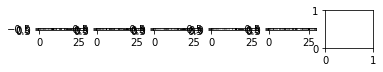

In [19]:
weights = model.layers[0].get_weights()[0]
import matplotlib.pyplot as plt
%matplotlib inline
# plot the first layer features
for i in range(0,30):
	plt.subplot(5,6,i+1)
	plt.imshow(weights[i][0], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

In [3]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [13]:
!pip install matplotlib

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


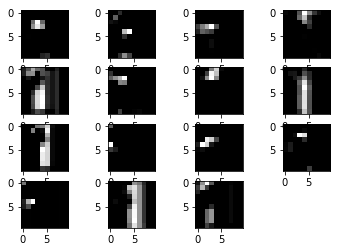

In [17]:
import matplotlib.pyplot as plt
from keras.models import load_model
from keras import backend as K
from scipy.misc import imread

# load a model
#model = load_model('bettercnn.h5')

# load an image
image = imread("1.PNG").astype(float)

# normalise it in the same manner as we did for the training data
image = image / 255.0

# reshape
image = image.reshape(1,1,28,28)

# define a keras function to extract the 3rd layer response maps
get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[2].output])
layer_output = get_3rd_layer_output([image])[0]

# plot the results
for i in range(0,15):
	plt.subplot(4,4,i+1)
	plt.imshow(layer_output[0][i], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

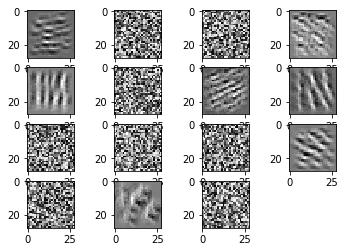

In [22]:
import matplotlib.pyplot as plt
from keras.models import load_model
from keras import backend as K
import numpy as np


# load a model
#model = load_model('bettercnn.h5')

input_img = model.input

step=1

# we're interested in maximising outputs of the 3rd layer:
layer_output = model.layers[3].output

for i in range(0,15):
	# build a loss function that maximizes the activation
	# of the nth filter of the layer considered
	loss = K.mean(layer_output[:, i, :, :])

	# compute the gradient of the input picture wrt this loss
	grads = K.gradients(loss, input_img)[0]

	# normalization trick: we normalize the gradient
	grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

	# this function returns the loss and grads given the input picture
	iterate = K.function([input_img], [loss, grads])

	# we start from a gray image with some noise
	input_img_data = np.random.random((1, 1, 28, 28)) * 0.07 + 0.5
	
	# run gradient ascent for 50 steps
	for j in range(50):
		loss_value, grads_value = iterate([input_img_data])
		input_img_data += grads_value * step

	# plot the results
	plt.subplot(4,4,i+1)
	plt.imshow(input_img_data[0][0], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

In [1]:
from keras.layers import Input
from keras.layers.merge import add
from keras.models import Model

def branch_model():
	model = Sequential()

	x = Input(shape=(1, 28, 28))
	left = Convolution2D(16, (1, 1), padding='same')(x)
	right = Convolution2D(16, (5, 5), padding='same', input_shape=(1, 28, 28), activation='relu')(x)
	y = add([left, right])
	block = Model(inputs=x, outputs=y)

	model.add(block)
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

Using TensorFlow backend.


In [4]:
# build the model
model = branch_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


NameError: name 'num_classes' is not defined

In [28]:
!wget "https://github.com/jonhare/vlc-deep-learning-labs/raw/master/2.PNG"

# load an image
image = imread("2.PNG").astype(float)

# normalise it in the same manner as we did for the training data
image = image / 255.0

#reshape
image = image.reshape(1,1,28,28)

# forward propagate and print index of most likely class 
# (for MNIST this corresponds one-to-one with the digit)
print("predicted digit: "+str(model.predict_classes(image)[0]))

--2019-04-23 09:08:52--  https://github.com/jonhare/vlc-deep-learning-labs/raw/master/2.PNG
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jonhare/vlc-deep-learning-labs/master/2.PNG [following]
--2019-04-23 09:08:52--  https://raw.githubusercontent.com/jonhare/vlc-deep-learning-labs/master/2.PNG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156 [image/png]
Saving to: ‘2.PNG’

2.PNG               100%[===================>]     156  --.-KB/s    in 0s      

2019-04-23 09:08:52 (7.91 MB/s) - ‘2.PNG’ saved [156/156]

predicted digit: 2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


In [29]:
ls

1.PNG  1.PNG.1  1.PNG.2  2.PNG  adc.json  cnn_mnist.h5  drive/  sample_data/


In [6]:
model.save('model_cnn.h5')

In [7]:
ls

1.PNG  4.PNG  7.PNG  cnn_mnist.py             keras_first.py
2.PNG  5.PNG  8.PNG  Copy_of_cnn_mnist.ipynb  mnist_keras_percep.py
3.PNG  6.PNG  9.PNG  deep_mnist.ipynb         model_cnn.h5


In [9]:
model.save('dense_model_mnist.h5')

In [10]:
ls

1.PNG  3.PNG  7.PNG         Copy_of_cnn_mnist.ipynb  mnist_keras_percep.py
2.png  4.PNG  8.PNG         deep_mnist.ipynb         model_cnn.h5
2.PNG  5.PNG  9.PNG         dense_model_mnist.h5     predict_from_raw.ipynb
3.png  6.PNG  cnn_mnist.py  keras_first.py           test_images/
